In [66]:
#UNO MODES
HAVE_A_FIXED_INITIAL_CARD = False
FIXED_INDEX_PLAYERS_CARDS = []
NUMBER_OF_PLAYERS = 4
NUMBER_OF_SIMULATIONS = 500

In [67]:
from data_analysis.SimulationGenerator import SimulationGenerator

simulation = SimulationGenerator(number_of_players=NUMBER_OF_PLAYERS,n_cards_fixed_input=FIXED_INDEX_PLAYERS_CARDS)
simulation.generate_new_simulation_input_sample()
UNO = simulation.generating_uno_simulation() 

In [68]:
if HAVE_A_FIXED_INITIAL_CARD:
    FIXED_INITIAL_CARD = simulation.get_game_first_card()
else:
    FIXED_INITIAL_CARD = None

Creating dataset

In [ ]:
import pandas as pd

df_simulation = pd.DataFrame()

dataset_csv = pd.read_csv('dataset/fixed_players_input.csv', header = 0, sep = ',', encoding = 'utf-8',engine='c')
dataset_csv = dataset_csv.set_index('Simulation')

data_set_new_columns = pd.DataFrame()

dataset_csv.info()

<h5> Simulation DataSet - Fixing Players First Cards and Game's first card as inputs</h5>

In [ ]:
from pandas import *   

for j in range(0,NUMBER_OF_SIMULATIONS):
    retorno = UNO.round(FIXED_INITIAL_CARD,simulation.initial_players_cards)
    
    if not FIXED_INITIAL_CARD:
        simulation.FIRST_CARD = retorno.first_card
        
    df_simulation.at[j,'Simulation'] = j+1
    df_simulation.at[j,'Ganhador'] = retorno.winner
    df_simulation.at[j,'Player 0'] = str(retorno.first_players_hands[0])
    df_simulation.at[j,'Player 1'] = str(retorno.first_players_hands[1])
    df_simulation.at[j,'Player 2'] = str(retorno.first_players_hands[2])
    df_simulation.at[j,'Player 3'] = str(retorno.first_players_hands[3])
    df_simulation.at[j,'First Card of The Game'] = str(retorno.first_card)
    df_simulation.at[j,'HMCCT - P0'] = str(simulation.calculating_probability_of_player_having_card_to_throw_on_hand(simulation.get_players_initial_cards()[0]))
    df_simulation.at[j,'HMCCT - P1'] = str(simulation.calculating_probability_of_player_having_card_to_throw_on_hand(simulation.get_players_initial_cards()[1]))
    df_simulation.at[j,'HMCCT - P2'] = str(simulation.calculating_probability_of_player_having_card_to_throw_on_hand(simulation.get_players_initial_cards()[2]))
    df_simulation.at[j,'HMCCT - P3'] = str(simulation.calculating_probability_of_player_having_card_to_throw_on_hand(simulation.get_players_initial_cards()[3]))

    simulation.update_for_new_simulation()
    

In [71]:
df_simulation.head(2)

,Simulation,Ganhador,Player 0,Player 1,Player 2,Player 3,First Card of The Game,HMCCT - P0,HMCCT - P1,HMCCT - P2,HMCCT - P3
0,1.0,Player 3,"['Card (C, yellow)', 'Card (8, green)', 'Card ...","['Card (R, yellow)', 'Card (R, red)', 'Card (0...","['Card (5, green)', 'Card (6, red)', 'Card (4,...","['Card (2, blue)', 'Card (W, blue)', 'Card (8,...","Card (X, blue)",4,0,2,3
1,2.0,Player 3,"['Card (5, yellow)', 'Card (4, red)', 'Card (+...","['Card (8, blue)', 'Card (1, green)', 'Card (X...","['Card (W, red)', 'Card (2, green)', 'Card (+,...","['Card (2, red)', 'Card (3, yellow)', 'Card (5...","Card (9, red)",2,1,2,2


Análise de Dados com mãos fixas

In [72]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import statistics

In [73]:
amostra_non_fixed = list(df_simulation['Ganhador'].value_counts())
mean_nf = statistics.mean(amostra_non_fixed)
std_nf = statistics.stdev(amostra_non_fixed)

amostra_fixed_hand = list(df_simulation['Ganhador'].value_counts())
m = statistics.mean(amostra_fixed_hand)
s = statistics.stdev(amostra_fixed_hand)
normalDist = statistics.NormalDist(m,s)

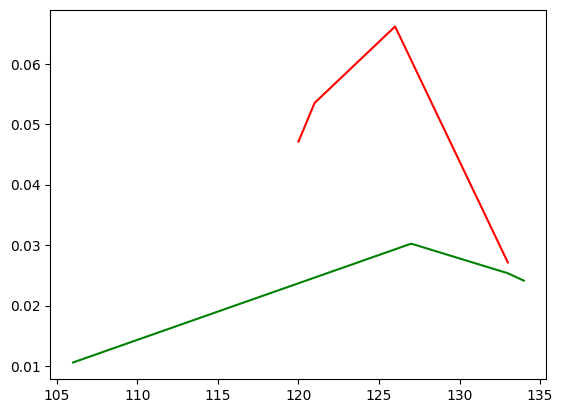

In [79]:

plt.plot(amostra_fixed_hand,stats.norm.pdf(amostra_fixed_hand,m,s),'r')
plt.plot(amostra_non_fixed,stats.norm.pdf(amostra_non_fixed,mean_nf,std_nf),'g')

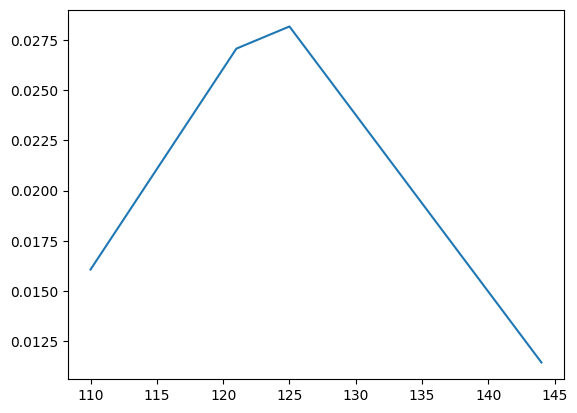

In [43]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import statistics

amostra_fixed_hand = list(df_simulation['Ganhador'].value_counts())
m = statistics.mean(amostra_fixed_hand)
s = statistics.stdev(amostra_fixed_hand)
normalDist = statistics.NormalDist(m,s)

plt.plot(amostra_fixed_hand,stats.norm.pdf(amostra_fixed_hand,m,s))


<h5> All Simulations Overview  - DataSet </h5>

In [ ]:
data_set_new_columns.at[0,'Simulation'] = 0
data_set_new_columns.at[0,'Fixed Players Indexs'] = str(FIXED_INDEX_PLAYERS_CARDS)
data_set_new_columns.at[0,'Number of Simulations'] = NUMBER_OF_SIMULATIONS
data_set_new_columns.at[0,'G - Player 0'] = df_simulation['Ganhador'].value_counts()['Player 0']
data_set_new_columns.at[0,'G - Player 1'] = df_simulation['Ganhador'].value_counts()['Player 1']
data_set_new_columns.at[0,'G - Player 2'] = df_simulation['Ganhador'].value_counts()['Player 2']
data_set_new_columns.at[0,'G - Player 3'] = df_simulation['Ganhador'].value_counts()['Player 3']
data_set_new_columns.at[0,'Player 0'] = str(retorno.first_players_hands[0])
data_set_new_columns.at[0,'Player 1'] = str(retorno.first_players_hands[1])
data_set_new_columns.at[0,'Player 2'] = str(retorno.first_players_hands[2])
data_set_new_columns.at[0,'Player 3'] = str(retorno.first_players_hands[3])
data_set_new_columns.at[0,'(AC/NC) P0'] = str(simulation.verify_action_card(simulation.get_players_initial_cards()[0]))
data_set_new_columns.at[0,'(AC/NC) P1'] = str(simulation.verify_action_card(simulation.get_players_initial_cards()[1]))
data_set_new_columns.at[0,'(AC/NC) P2'] = str(simulation.verify_action_card(simulation.get_players_initial_cards()[2]))
data_set_new_columns.at[0,'(AC/NC) P3'] = str(simulation.verify_action_card(simulation.get_players_initial_cards()[3]))
data_set_new_columns.at[0,'First Card of The Game'] = str(retorno.first_card)
data_set_new_columns = data_set_new_columns.set_index('Simulation')

dataset = pd.concat([dataset_csv,data_set_new_columns],axis=0,ignore_index=False)
dataset.to_csv('dataset/fixed_players_input.csv')

In [ ]:
dataset.head(10)